## **import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from sklearn import preprocessing
import random
import pandas as pd
from matplotlib.colors import Sequence
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Conv1D, Flatten
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping


### **read main dataset**

In [2]:
data = pd.read_csv('/content/drive/MyDrive/dataset/original_result.csv')
data.head()
main_dataframe = data.transpose()
main_dataframe.head()
column_name = main_dataframe.iloc[0]
main_dataframe = main_dataframe[1:]
main_dataframe.columns = column_name
main_dataframe

operationName,post_storage_read_posts_server,read_home_timeline_server,read_home_timeline_redis_find_client,read_home_timeline_client,/wrk2-api/home-timeline/read,compose_creator_server,compose_media_server,url_mongo_insert_client,compose_urls_server,compose_user_mentions_memcached_get_client,...,write_user_timeline_server,read_user_timeline_redis_find_client,user_timeline_mongo_find_client,user_timeline_redis_update_client,read_user_timeline_server,/wrk2-api/user-timeline/read,ReadUserTimeline,post_storage_mmc_mget_client,mmc_set_client,mongo_find_client
5 secound,15,11,11,11,21,2,2,2,2,2,...,2,4,4,0,4,8,4,0,0,0
10 secound,24,14,14,14,28,3,3,3,3,3,...,3,10,10,1,10,20,10,0,0,0
15 secound,13,7,7,7,14,2,2,2,2,2,...,2,6,6,0,6,12,6,0,0,0
20 secound,21,15,15,15,30,2,2,2,2,2,...,2,6,6,0,6,12,6,0,0,0
25 secound,17,14,14,14,28,1,1,1,1,1,...,1,3,3,1,3,6,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28780 secound,24,17,17,17,34,1,1,1,1,1,...,1,7,4,4,7,14,7,4,3,3
28785 secound,15,9,9,9,18,3,3,3,3,3,...,3,6,2,2,6,12,6,5,3,3
28790 secound,20,13,13,13,26,3,3,3,3,3,...,3,7,2,2,7,14,7,5,5,5
28795 secound,7,5,5,5,10,5,5,5,5,5,...,5,2,2,2,2,4,2,0,0,0


### **change form of Dataset**

In [3]:
indexes = [item for item in range(0,5760)]
main_dataframe.index=indexes
main_dataframe = main_dataframe.astype(float)
main_dataframe.head()

operationName,post_storage_read_posts_server,read_home_timeline_server,read_home_timeline_redis_find_client,read_home_timeline_client,/wrk2-api/home-timeline/read,compose_creator_server,compose_media_server,url_mongo_insert_client,compose_urls_server,compose_user_mentions_memcached_get_client,...,write_user_timeline_server,read_user_timeline_redis_find_client,user_timeline_mongo_find_client,user_timeline_redis_update_client,read_user_timeline_server,/wrk2-api/user-timeline/read,ReadUserTimeline,post_storage_mmc_mget_client,mmc_set_client,mongo_find_client
0,15.0,11.0,11.0,11.0,21.0,2.0,2.0,2.0,2.0,2.0,...,2.0,4.0,4.0,0.0,4.0,8.0,4.0,0.0,0.0,0.0
1,24.0,14.0,14.0,14.0,28.0,3.0,3.0,3.0,3.0,3.0,...,3.0,10.0,10.0,1.0,10.0,20.0,10.0,0.0,0.0,0.0
2,13.0,7.0,7.0,7.0,14.0,2.0,2.0,2.0,2.0,2.0,...,2.0,6.0,6.0,0.0,6.0,12.0,6.0,0.0,0.0,0.0
3,21.0,15.0,15.0,15.0,30.0,2.0,2.0,2.0,2.0,2.0,...,2.0,6.0,6.0,0.0,6.0,12.0,6.0,0.0,0.0,0.0
4,17.0,14.0,14.0,14.0,28.0,1.0,1.0,1.0,1.0,1.0,...,1.0,3.0,3.0,1.0,3.0,6.0,3.0,0.0,0.0,0.0


# **normalise Data in Dataset**

In [4]:
scaler = MinMaxScaler()
for column in main_dataframe.columns:
  main_dataframe[column] =  scaler.fit_transform(main_dataframe[[column]])

main_dataframe.head()

operationName,post_storage_read_posts_server,read_home_timeline_server,read_home_timeline_redis_find_client,read_home_timeline_client,/wrk2-api/home-timeline/read,compose_creator_server,compose_media_server,url_mongo_insert_client,compose_urls_server,compose_user_mentions_memcached_get_client,...,write_user_timeline_server,read_user_timeline_redis_find_client,user_timeline_mongo_find_client,user_timeline_redis_update_client,read_user_timeline_server,/wrk2-api/user-timeline/read,ReadUserTimeline,post_storage_mmc_mget_client,mmc_set_client,mongo_find_client
0,0.333333,0.392857,0.392857,0.392857,0.375000,0.250,0.250,0.250,0.250,0.250,...,0.250,0.2500,0.2500,0.0000,0.2500,0.2500,0.2500,0.0,0.0,0.0
1,0.606061,0.500000,0.500000,0.500000,0.500000,0.375,0.375,0.375,0.375,0.375,...,0.375,0.6250,0.6250,0.0625,0.6250,0.6250,0.6250,0.0,0.0,0.0
2,0.272727,0.250000,0.250000,0.250000,0.250000,0.250,0.250,0.250,0.250,0.250,...,0.250,0.3750,0.3750,0.0000,0.3750,0.3750,0.3750,0.0,0.0,0.0
3,0.515152,0.535714,0.535714,0.535714,0.535714,0.250,0.250,0.250,0.250,0.250,...,0.250,0.3750,0.3750,0.0000,0.3750,0.3750,0.3750,0.0,0.0,0.0
4,0.393939,0.500000,0.500000,0.500000,0.500000,0.125,0.125,0.125,0.125,0.125,...,0.125,0.1875,0.1875,0.0625,0.1875,0.1875,0.1875,0.0,0.0,0.0


## **add Lag for target columns**

In [5]:
main_dataframe['future']=main_dataframe['post_storage_read_posts_server'].shift(-1)
main_dataframe.dropna(inplace = True)
main_dataframe.head()

operationName,post_storage_read_posts_server,read_home_timeline_server,read_home_timeline_redis_find_client,read_home_timeline_client,/wrk2-api/home-timeline/read,compose_creator_server,compose_media_server,url_mongo_insert_client,compose_urls_server,compose_user_mentions_memcached_get_client,...,read_user_timeline_redis_find_client,user_timeline_mongo_find_client,user_timeline_redis_update_client,read_user_timeline_server,/wrk2-api/user-timeline/read,ReadUserTimeline,post_storage_mmc_mget_client,mmc_set_client,mongo_find_client,future
0,0.333333,0.392857,0.392857,0.392857,0.375000,0.250,0.250,0.250,0.250,0.250,...,0.2500,0.2500,0.0000,0.2500,0.2500,0.2500,0.0,0.0,0.0,0.606061
1,0.606061,0.500000,0.500000,0.500000,0.500000,0.375,0.375,0.375,0.375,0.375,...,0.6250,0.6250,0.0625,0.6250,0.6250,0.6250,0.0,0.0,0.0,0.272727
2,0.272727,0.250000,0.250000,0.250000,0.250000,0.250,0.250,0.250,0.250,0.250,...,0.3750,0.3750,0.0000,0.3750,0.3750,0.3750,0.0,0.0,0.0,0.515152
3,0.515152,0.535714,0.535714,0.535714,0.535714,0.250,0.250,0.250,0.250,0.250,...,0.3750,0.3750,0.0000,0.3750,0.3750,0.3750,0.0,0.0,0.0,0.393939
4,0.393939,0.500000,0.500000,0.500000,0.500000,0.125,0.125,0.125,0.125,0.125,...,0.1875,0.1875,0.0625,0.1875,0.1875,0.1875,0.0,0.0,0.0,0.363636


In [6]:
main_dataframe = main_dataframe[main_dataframe['future'] != 0]
for index, row in main_dataframe.iterrows():
  if row['future'] == 0:
    main_dataframe.drop(index , inplace=True)

In [7]:
print(main_dataframe['future'].dtype)
print(main_dataframe['future'].isnull().sum())
print(main_dataframe['future'].unique())
zero_values = main_dataframe[main_dataframe['future'] == 0]
print(zero_values)

float64
0
[0.60606061 0.27272727 0.51515152 0.39393939 0.36363636 0.42424242
 0.57575758 0.54545455 0.3030303  0.48484848 0.45454545 0.63636364
 0.66666667 0.24242424 0.33333333 0.21212121 0.72727273 0.15151515
 0.18181818 0.6969697  0.12121212 0.78787879 0.75757576 0.81818182
 0.90909091 0.03030303 0.87878788 0.06060606 1.         0.09090909
 0.84848485]
Empty DataFrame
Columns: [post_storage_read_posts_server, read_home_timeline_server, read_home_timeline_redis_find_client, read_home_timeline_client, /wrk2-api/home-timeline/read, compose_creator_server, compose_media_server, url_mongo_insert_client, compose_urls_server, compose_user_mentions_memcached_get_client, compose_user_mentions_mongo_find_client, compose_user_mentions_server, post_storage_mongo_insert_client, store_post_server, compose_unique_id_server, get_followers_server, social_graph_redis_get_client, social_graph_mongo_find_client, write_home_timeline_redis_update_client, write_home_timeline_server, get_followers_client, 

# function Preparing input data for LSTM model

In [8]:
def preprocessing(df , batch_size):
  # every i is one row of data
  sequense=[]
  prev_items = deque(maxlen=batch_size)
  for i in df.values:
    prev_items.append([n for n in i[:-1]])
    if len(prev_items) == batch_size :
      sequense.append([np.array(prev_items),i[-1]])

  # random.shuffle(sequense)
  # len(sequense)
  # print('first sequence  ',len(sequense[0]))
  # print('last  sequence  ',len(sequense[-1]))

  x = []
  y = []
  for seq , target in sequense:
    x.append(seq)
    y.append(target)
  return np.array(x) , np.array(y)

# Test And Train Data

In [9]:
train_data = main_dataframe.iloc[:5000, :]
test_data = main_dataframe.iloc[5000:, :]




batch_size = 32

train_X , train_y = preprocessing(main_dataframe, 32)
print('train_x:' , train_X.shape ,'train_y:',train_y.shape )
test_X , test_y = preprocessing(test_data,batch_size=batch_size)
print('test_x:' , test_X.shape ,'test_y:',test_y.shape )



train_x: (5727, 32, 46) train_y: (5727,)
test_x: (727, 32, 46) test_y: (727,)


# Design recurrent Neural network Model

In [10]:
model = Sequential()

model.add(LSTM(128, input_shape=(train_X.shape[1:]), return_sequences=True))

model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LSTM(64 , activation='tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation="relu"))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae','mape'])


# USing EarlyStopping

In [11]:

callback = EarlyStopping(
    monitor='loss',
    patience = 20,
    min_delta=0.000001
)

# Add CheckPoint for save best Model



In [12]:
from keras.callbacks import ModelCheckpoint
# Define a checkpoint callback
checkpoint = ModelCheckpoint('best_model.h5',
                             monitor='val_loss',
                             save_best_only=True,
                             mode='min',
                             verbose=1)

In [13]:
#test dont have target value with 0 => for calculate map metric target_value != 0
if 0 in train_y:
  print('have zero column')

# execute Model

In [14]:
history = model.fit(train_X, train_y, batch_size=64,epochs=500, validation_data=(test_X, test_y),callbacks=[checkpoint])


Epoch 1/500
87/90 [============================>.] - ETA: 0s - loss: 0.2492 - mae: 0.4151 - mape: 102.1709
Epoch 1: val_loss improved from inf to 0.20121, saving model to best_model.h5
90/90 [==============================] - 16s 26ms/step - loss: 0.2465 - mae: 0.4133 - mape: 101.6889 - val_loss: 0.2012 - val_mae: 0.4285 - val_mape: 100.0000
Epoch 2/500
11/90 [==>...........................] - ETA: 0s - loss: 0.1850 - mae: 0.3848 - mape: 93.0725

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


89/90 [============================>.] - ETA: 0s - loss: 0.1746 - mae: 0.3764 - mape: 91.0337
Epoch 2: val_loss did not improve from 0.20121
90/90 [==============================] - 1s 13ms/step - loss: 0.1747 - mae: 0.3765 - mape: 91.0189 - val_loss: 0.2012 - val_mae: 0.4285 - val_mape: 100.0000
Epoch 3/500
90/90 [==============================] - ETA: 0s - loss: 0.1620 - mae: 0.3574 - mape: 86.8702
Epoch 3: val_loss did not improve from 0.20121
90/90 [==============================] - 1s 12ms/step - loss: 0.1620 - mae: 0.3574 - mape: 86.8702 - val_loss: 0.2012 - val_mae: 0.4285 - val_mape: 100.0000
Epoch 4/500
88/90 [============================>.] - ETA: 0s - loss: 0.1375 - mae: 0.3217 - mape: 79.7029
Epoch 4: val_loss improved from 0.20121 to 0.08277, saving model to best_model.h5
90/90 [==============================] - 1s 10ms/step - loss: 0.1368 - mae: 0.3206 - mape: 79.4446 - val_loss: 0.0828 - val_mae: 0.2479 - val_mape: 54.7262
Epoch 5/500
88/90 [============================>

# Load Best Model

In [15]:
from keras.models import load_model
best_model = load_model('best_model.h5')

# show result of Prediction

23/23 [==============================] - 1s 4ms/step


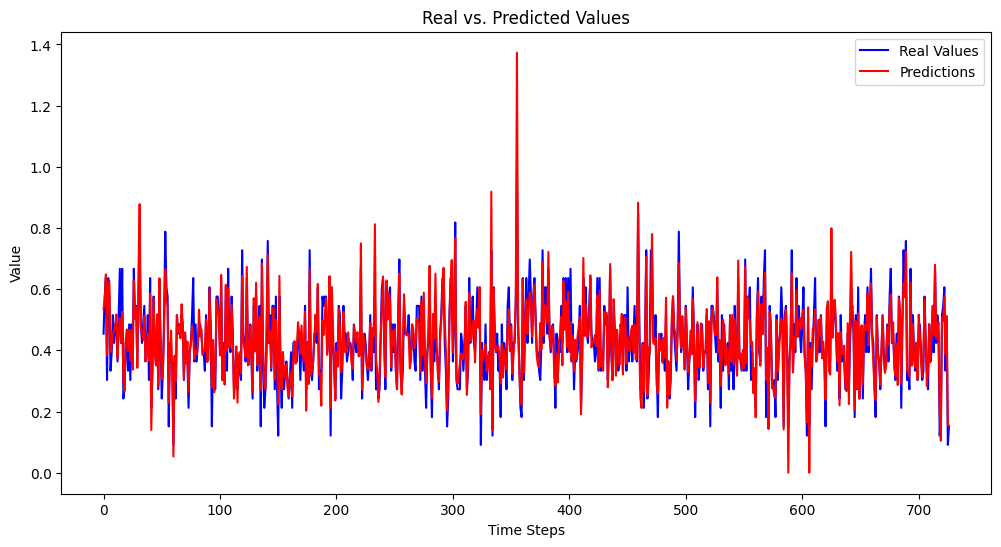

In [16]:
predictions = model.predict(test_X)

# Plot the predictions and real values
plt.figure(figsize=(12, 6))
plt.plot(test_y, label='Real Values', color='blue')
plt.plot(predictions, label='Predictions', color='red')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Real vs. Predicted Values')
plt.legend()
plt.show()

# Evaluate Model metrics

In [17]:
# Assuming you have multiple metrics in your model compilation
metrics_names = model.metrics_names

# Evaluate the model on the test set
evaluation_results = model.evaluate(test_X, test_y)

# Print the evaluation results for each metric
for metric_name, result in zip(metrics_names, evaluation_results):
    print(f"{metric_name}: {result:.4f}")

23/23 [==============================] - 0s 5ms/step - loss: 0.0027 - mae: 0.0375 - mape: 10.2556
loss: 0.0027
mae: 0.0375
mape: 10.2556


In [18]:
predictions[600] , test_y[600]

(array([0.5140354], dtype=float32), 0.48484848484848486)